In [1]:
import pandas as pd
df_music=pd.read_csv('data.csv')
df_2genre=pd.read_csv('data_2genre.csv')

In [2]:
df_music = pd.concat([df_music, df_2genre])

In [3]:
df_music.head(5)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
df_music.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [5]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1200 non-null   object 
 1   tempo               1200 non-null   float64
 2   beats               1200 non-null   int64  
 3   chroma_stft         1200 non-null   float64
 4   rmse                1200 non-null   float64
 5   spectral_centroid   1200 non-null   float64
 6   spectral_bandwidth  1200 non-null   float64
 7   rolloff             1200 non-null   float64
 8   zero_crossing_rate  1200 non-null   float64
 9   mfcc1               1200 non-null   float64
 10  mfcc2               1200 non-null   float64
 11  mfcc3               1200 non-null   float64
 12  mfcc4               1200 non-null   float64
 13  mfcc5               1200 non-null   float64
 14  mfcc6               1200 non-null   float64
 15  mfcc7               1200 non-null   float64
 16  mfcc8  

In [6]:
df_music.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [7]:
df_music['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: label, dtype: int64

In [8]:
df_music['label'] = df_music['label'].replace(to_replace={1: 'pop', 2: 'classical'})

In [9]:
df_music['label'].value_counts()

classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: label, dtype: int64

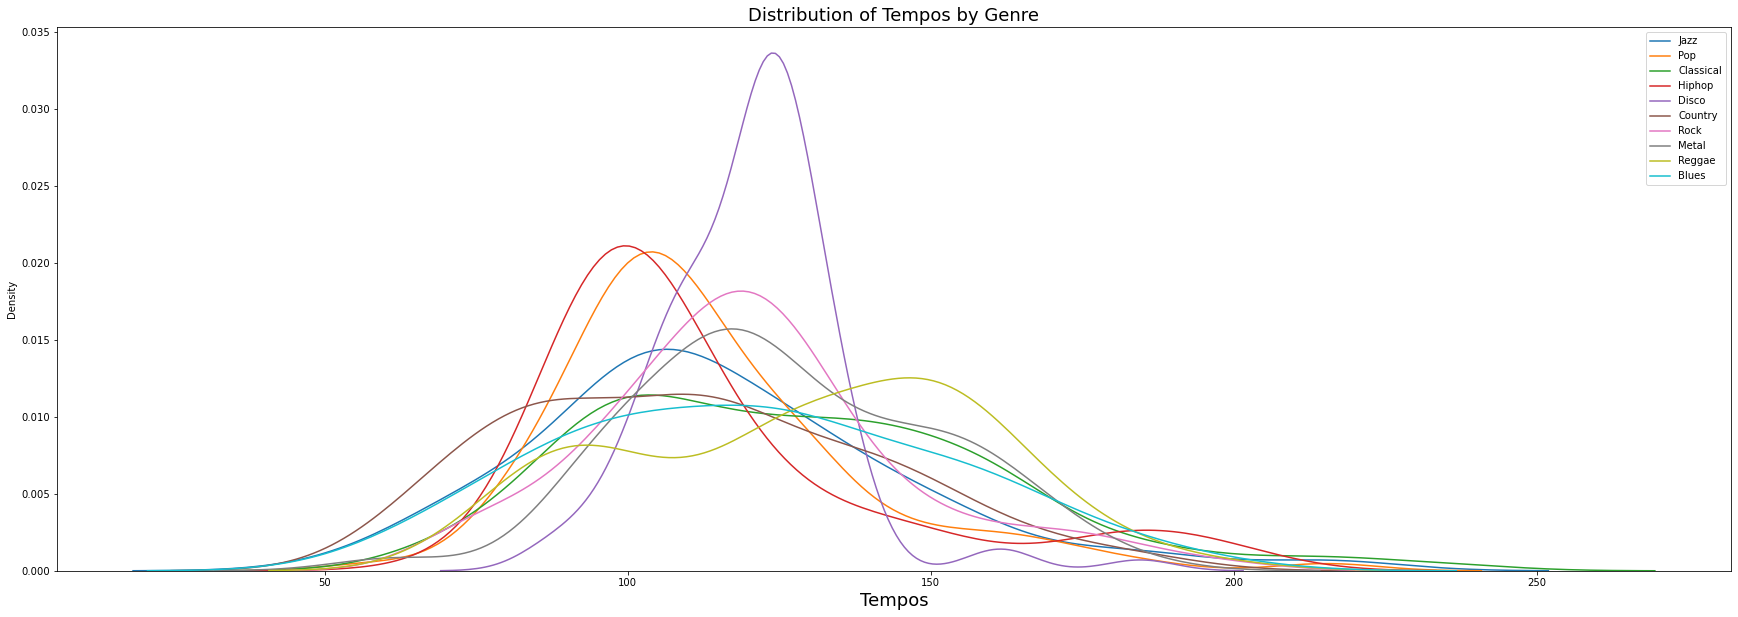

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

sns.kdeplot(data=df_music.loc[df_music['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(data=df_music.loc[df_music['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(data=df_music.loc[df_music['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(data=df_music.loc[df_music['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(data=df_music.loc[df_music['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(data=df_music.loc[df_music['label']=='country', 'tempo'], label="Country")
sns.kdeplot(data=df_music.loc[df_music['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(data=df_music.loc[df_music['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(data=df_music.loc[df_music['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(data=df_music.loc[df_music['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of Tempos by Genre", fontsize=18)
plt.xlabel("Tempos", fontsize=18)
plt.legend()

plt.show()


Text(0, 0.5, 'Mean Tempo')

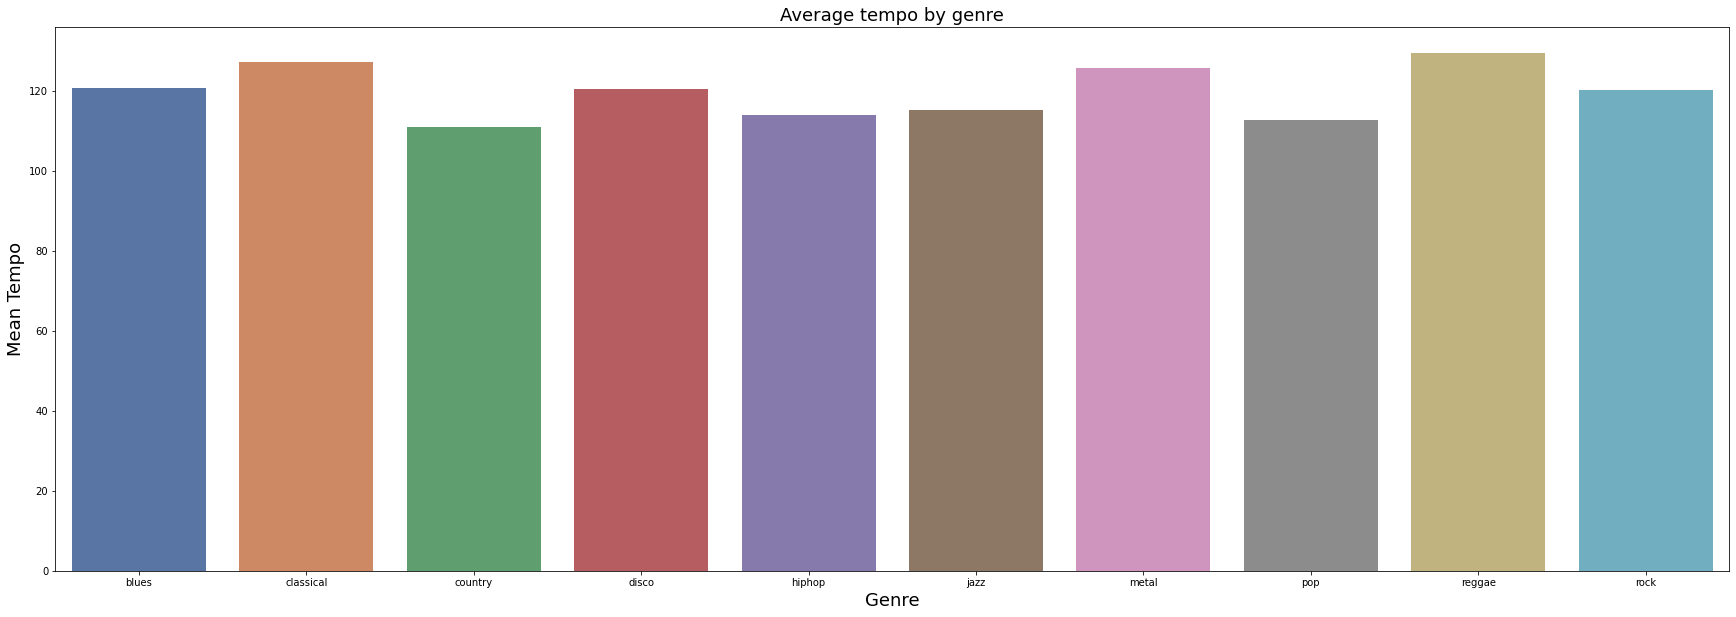

In [11]:
plt.figure(figsize=(30,10))

genres = df_music['label'].unique()

tempos = [ df_music[df_music['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, palette="deep")

plt.title("Average tempo by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [13]:
df_music = df_music.drop('filename', axis=1)

In [22]:
X = df_music.drop('label', axis=1)
y_true = df_music['label']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
num_clusters = len(df_music['label'].unique()) # Define the number of clusters (genres)
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)# Apply K-means clustering
kmeans.fit(X_scaled)

C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=10, n_init=10, random_state=42)

In [33]:
y_pred = kmeans.labels_

In [34]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


In [35]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.12
